# Unsupervised Learning Algorithms - K-Means Clustering
Build a K-Means Model for the given dataset. Build a K-Means Model for the given Dataset. Use the Elbow or Silhouette method to find the best possible K-value. Use the cost function as WCSS(Within Cluster Sum of Squares). Curate a new data point and find which cluster it goes to. Write the inference. 

#### Import libraries and load data

In [107]:
import numpy as np 
import pandas as pd 
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'.\Datasets\167-Countries-Data.csv')
df.info()
df.drop(columns=['Country'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  167 non-null    int64  
 1   Country     167 non-null    object 
 2   Child_Mort  167 non-null    float64
 3   Exports     167 non-null    float64
 4   Health      167 non-null    float64
 5   Imports     167 non-null    float64
 6   Income      167 non-null    int64  
 7   Inflation   167 non-null    float64
 8   Life_Expec  167 non-null    float64
 9   Total_Fer   167 non-null    float64
 10  GDDP        167 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 14.5+ KB


#### 

#### Preprocessing the data

In [108]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
print(df)

     Unnamed: 0  Child_Mort  Exports  Health  Imports  Income  Inflation  \
0             0         118        5      92       80      17        117   
1             1          51       51      76       87      80         79   
2             2          73       78      24       43      91        137   
3             3         131      120      10       72      58        148   
4             4          33       93      69      112     111         34   
..          ...         ...      ...     ...      ...     ...        ...   
162         162          76       95      50       98      36         54   
163         163          52       53      38        7     104        154   
164         164          68      132      81      140      49        126   
165         165          98       60      46       51      48        150   
166         166         115       75      64       40      38        131   

     Life_Expec  Total_Fer  GDDP  
0             9        127    12  
1            93  

### Creating input array 

In [109]:
X = df.iloc[:,:].values
print(X[:5])

[[  0 118   5  92  80  17 117   9 127  12]
 [  1  51  51  76  87  80  79  93  25  68]
 [  2  73  78  24  43  91 137  95  78  72]
 [  3 131 120  10  72  58 148  24 131  63]
 [  4  33  93  69 112 111  34  98  46 111]]


#### Implementing K-Means Algorithm

In [110]:

class KMeans1:
    def __init__(self,n_clusters=3,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [111]:
km = KMeans1(n_clusters=3,max_iter=1000)
y_means = km.fit_predict(X)

print(y_means[:5])
print(X[:5])



[0 2 2 2 1]
[[  0 118   5  92  80  17 117   9 127  12]
 [  1  51  51  76  87  80  79  93  25  68]
 [  2  73  78  24  43  91 137  95  78  72]
 [  3 131 120  10  72  58 148  24 131  63]
 [  4  33  93  69 112 111  34  98  46 111]]


### Plotting the data

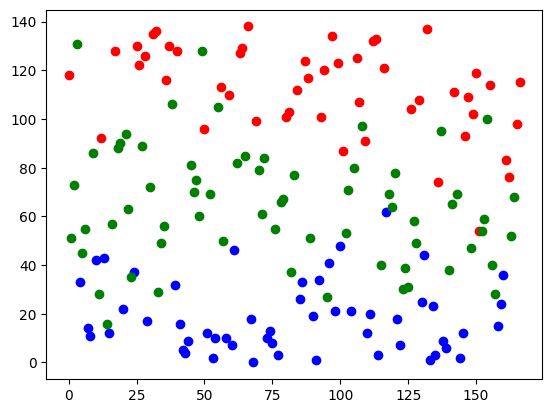

In [112]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')

plt.show()

#### Implementing elbow and silhouette method to find best value of k

In [113]:
def elbow_method(X):
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [114]:
def silhouette_method(X):
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(range(2, 11), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()



c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

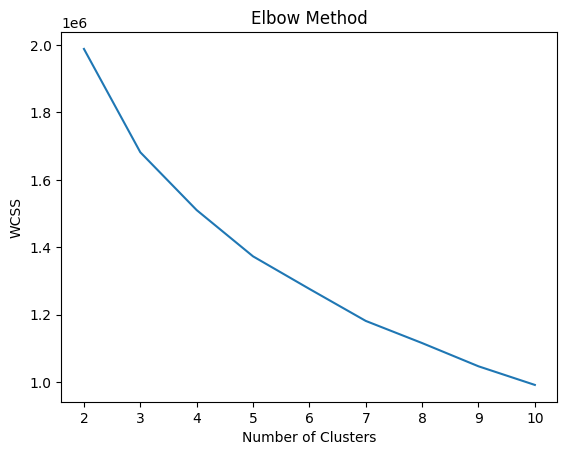

c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

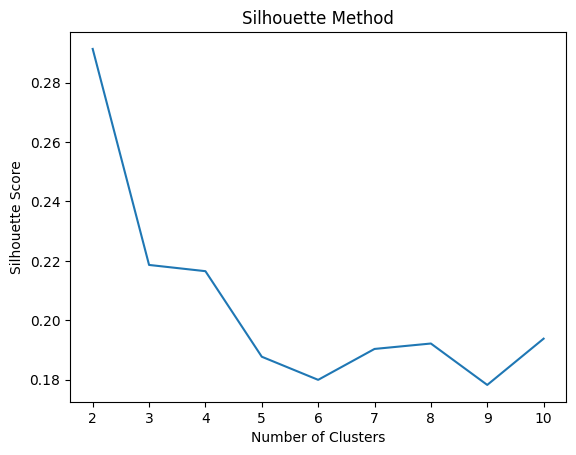

In [115]:
elbow_method(df)
silhouette_method(df)